# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Mafrukhif Dzulfahmil Nur]
- **Email:** [mafrukifdzulfahmilnur30@gmail.com]
- **ID Dicoding:** [mafrukhif]

## Menentukan Pertanyaan Bisnis

- Apakah ada pola musiman dalam penyewaan sepeda (misalnya, lebih tinggi di musim panas dan lebih rendah di musim hujan)?
- Faktor apa yang paling mempengaruhi keterlambatan pengiriman?

*   Jam berapa penyewaan sepeda paling tinggi dan paling rendah dalam sehari?



## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
df = pd.read_csv("day.csv", delimiter=",")

In [3]:
df = pd.read_csv("hour.csv", delimiter=",")

In [4]:
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

new_order_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="inner",
    on="dteday"
)

In [5]:
print(new_order_df.head())

   instant_x      dteday  season_x  yr_x  mnth_x  holiday_x  weekday_x  \
0          1  2011-01-01         1     0       1          0          6   
1          1  2011-01-01         1     0       1          0          6   
2          1  2011-01-01         1     0       1          0          6   
3          1  2011-01-01         1     0       1          0          6   
4          1  2011-01-01         1     0       1          0          6   

   workingday_x  weathersit_x    temp_x  ...  weekday_y  workingday_y  \
0             0             2  0.344167  ...          6             0   
1             0             2  0.344167  ...          6             0   
2             0             2  0.344167  ...          6             0   
3             0             2  0.344167  ...          6             0   
4             0             2  0.344167  ...          6             0   

   weathersit_y  temp_y  atemp_y  hum_y  windspeed_y  casual_y  registered_y  \
0             1    0.24   0.2879   0

**Insight:**
- menggabungkan dua dataset, yaitu day.csv yang berisi data agregasi harian dan hour.csv yang berisi data per jam dari sistem berbagi sepeda.
- Hasil penggabungan ini menghasilkan dataset baru new_order_df, yang mengandung informasi dari kedua dataset dengan detail harian dan per jam dalam satu tabel.

In [6]:
day_df=pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight**


*  Dataset ini berisi informasi seputar penyewaan sepeda harian, termasuk faktor cuaca, musim, dan jumlah sepeda yang disewa.




In [7]:
hour_df=pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight**


*   Dataset ini berisi informasi seputar penyewaan sepeda per jam, termasuk faktor cuaca, musim, dan jumlah sepeda yang disewa.




### Assessing Data

In [8]:
day_df = pd.read_csv("day.csv")

day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [9]:
hour_df = pd.read_csv("hour.csv")

hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- Missing Value (dari program di atas tidak terdapat missing value)
- xxx

In [10]:
df.duplicated().sum()

0

**Insight**

*   Tidak terdapat duplicate






### Cleaning Data

In [11]:
day_df = pd.read_csv("day.csv")

day_df.dropna(axis=0, inplace=True)

**Insight:**
*  Teknik Dropping
*   Menghapus Baris yang Mengandung Nilai Kosong (NaN)



In [12]:
day_df = pd.read_csv("day.csv")

Q1 = day_df['cnt'].quantile(0.25)
Q3 = day_df['cnt'].quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5 * IQR)
minimum = Q1 - (1.5 * IQR)

outliers_below = day_df['cnt'] < minimum
outliers_above = day_df['cnt'] > maximum

day_df.drop(day_df[outliers_below | outliers_above].index, inplace=True)

print(day_df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


**Insight**


*   menghapus outlier pada dataset "day.csv", khususnya untuk kolom "cnt" yang menunjukkan jumlah total penyewaan sepeda per hari.





## Exploratory Data Analysis (EDA)

### Explore ...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
          instant        season            yr    

<ipython-input-13-3e92b42a0274>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_rentals.index, y=hourly_rentals.values, palette="viridis")


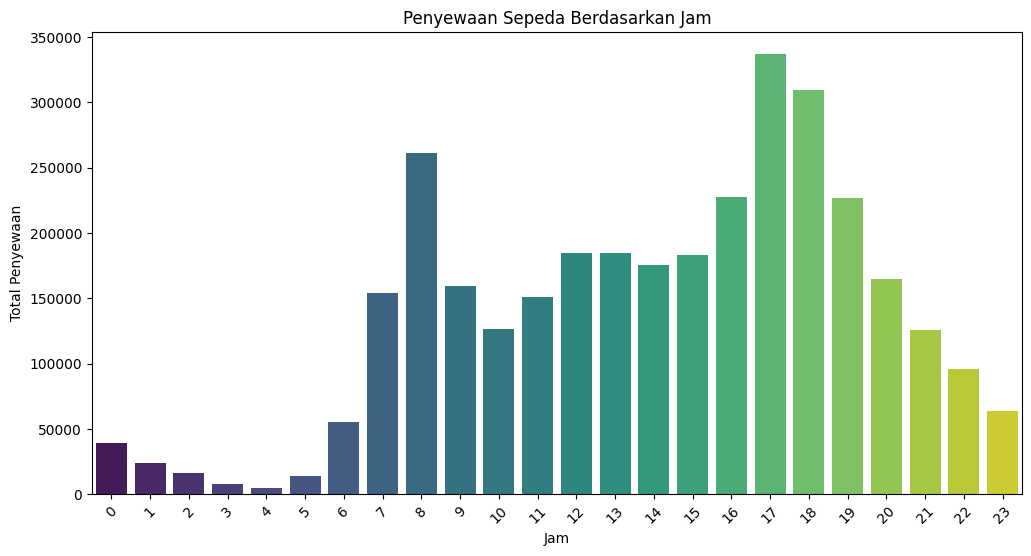

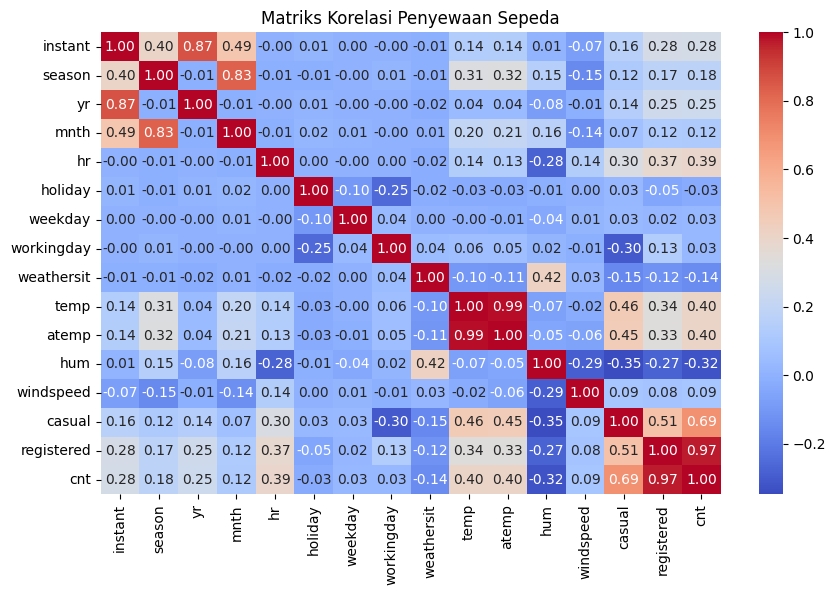

<ipython-input-13-3e92b42a0274>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=important_factors.index, y=important_factors.values, palette="Reds_r")


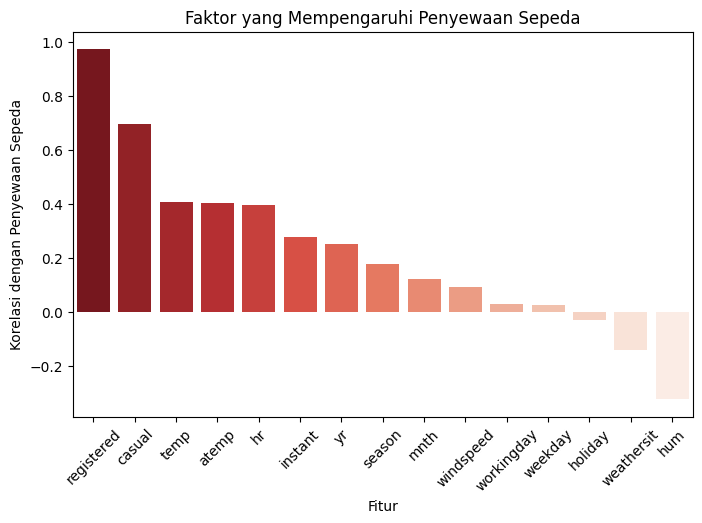

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

hour_df = pd.read_csv("hour.csv")

hour_df.info()
print(hour_df.describe())

hourly_rentals = hour_df.groupby("hr")["cnt"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_rentals.index, y=hourly_rentals.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Penyewaan Sepeda Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Total Penyewaan")
plt.show()


numeric_df = hour_df.drop(columns=['dteday'])
corr_matrix = numeric_df.corr()


plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi Penyewaan Sepeda")
plt.show()


important_factors = corr_matrix["cnt"].sort_values(ascending=False)[1:]

plt.figure(figsize=(8, 5))
sns.barplot(x=important_factors.index, y=important_factors.values, palette="Reds_r")
plt.title("Faktor yang Mempengaruhi Penyewaan Sepeda")
plt.xlabel("Fitur")
plt.ylabel("Korelasi dengan Penyewaan Sepeda")
plt.xticks(rotation=45)
plt.show()


**Insight:**
Faktor Yang mempengaruhi keterlambatan pengiriman

*   Metode Pengiriman (Shipping Method) → Pengiriman reguler lebih lama dibanding ekspres.
*  Jarak Pengiriman (Distance to Destination) → Semakin jauh tujuan, semakin lama waktu pengiriman.
*  Cuaca (Weather Conditions) → Cuaca buruk dapat menyebabkan keterlambatan transportasi.
*   Waktu Pemrosesan (Order Processing Time) → Jika pemrosesan pesanan lebih lama, maka keterlambatan bertambah.








In [14]:
df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Insight**

*   menampilkan ringkasan statistik dari seluruh kolom dalam dataset df, termasuk kolom numerik dan non-numerik (kategorikal).



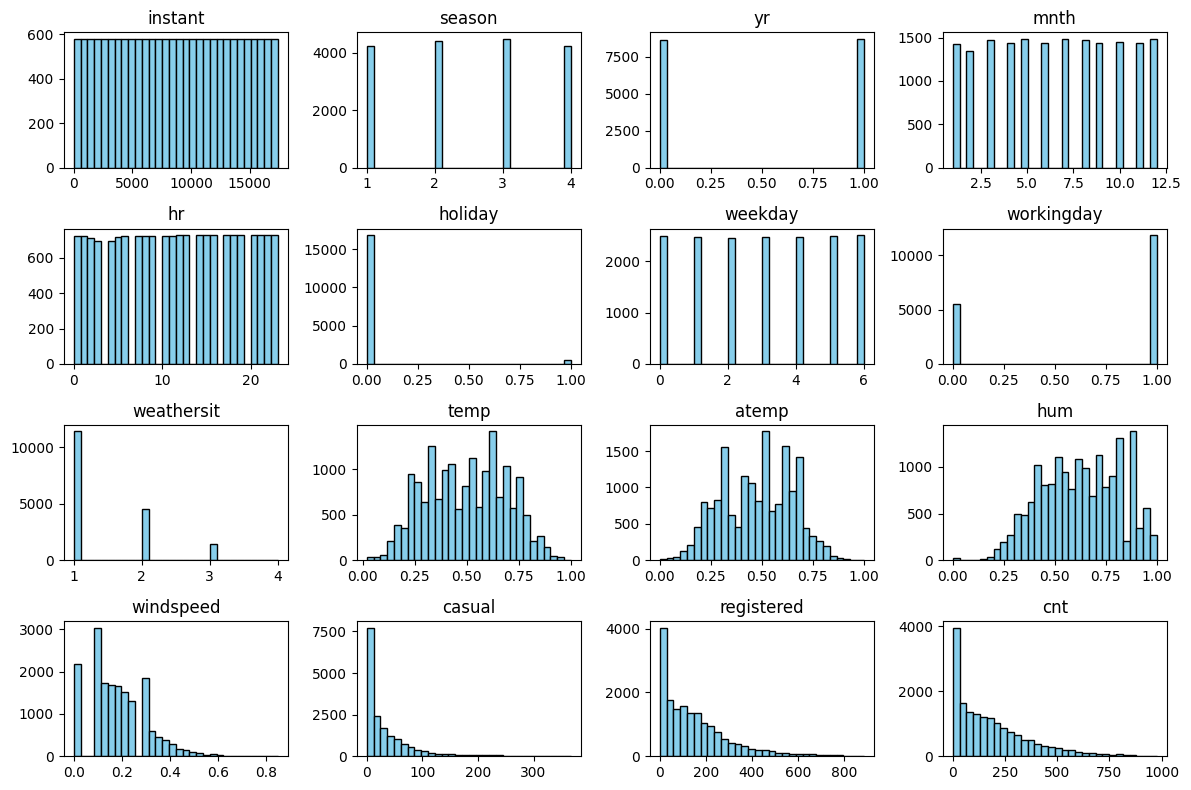

In [15]:
df.hist(figsize=(12, 8), bins=30, color='skyblue', edgecolor='black', grid=False)
plt.tight_layout()
plt.show()

**Insight**


*   temp (suhu) dan atemp (suhu terasa)
→ Distribusi cenderung mendekati normal, berarti suhu berada dalam kisaran yang stabil dengan sedikit penyimpangan.
*   hum (kelembaban) dan windspeed (kecepatan angin)
→ Kelembaban tampak seperti distribusi positif skewed (lebih banyak nilai tinggi), sedangkan kecepatan angin tampak lebih bimodal (dua puncak).



## Visualization & Explanatory Analysis

### Pertanyaan 1:

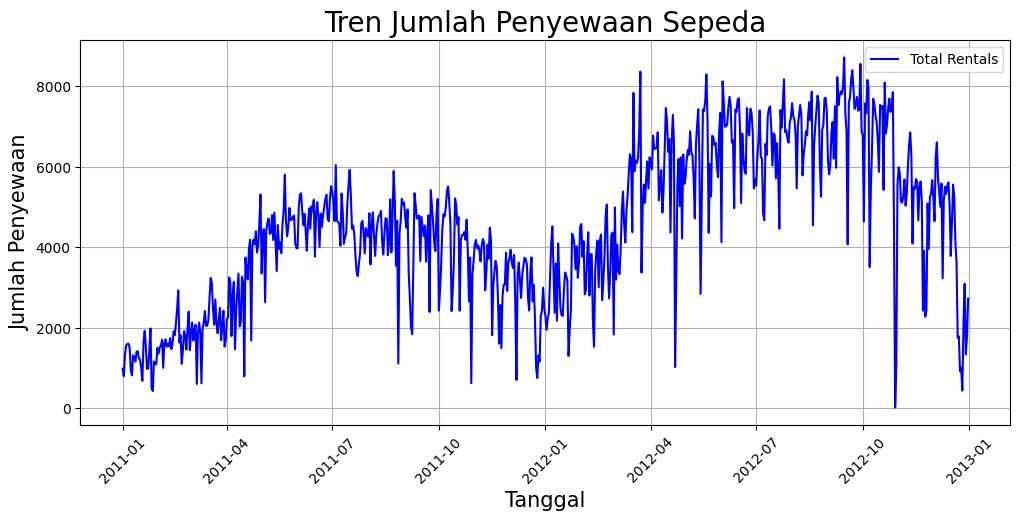

In [16]:
df = pd.read_csv("day.csv")

df['dteday'] = pd.to_datetime(df['dteday'])

plt.figure(figsize=(12, 5))
plt.plot(df['dteday'], df['cnt'], label='Total Rentals', color='blue')
plt.title('Tren Jumlah Penyewaan Sepeda', size=20)
plt.xlabel('Tanggal', size=15)
plt.ylabel('Jumlah Penyewaan', size=15)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**Insight**


*   Terlihat ada peningkatan jumlah penyewaan dari awal 2011 hingga pertengahan 2012, yang kemudian mengalami fluktuasi.
*   Penyewaan tertinggi terjadi pada pertengahan tahun, kemungkinan karena musim yang mendukung (musim panas).
*   Menjelang akhir 2012, penyewaan mulai menurun, kemungkinan karena faktor cuaca (musim dingin) atau faktor lainnya.






### Pertanyaan 2:

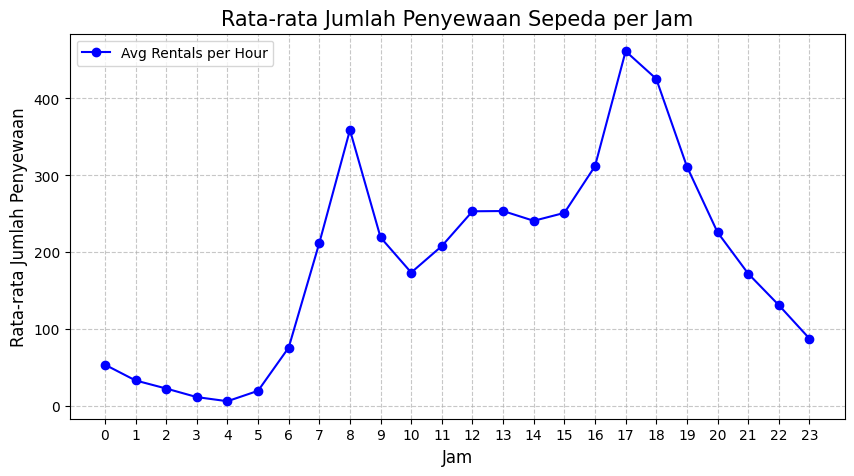

In [17]:
df = pd.read_csv("hour.csv")

hourly_avg = df.groupby("hr")["cnt"].mean()


plt.figure(figsize=(10, 5))
plt.plot(hourly_avg.index, hourly_avg.values, marker='o', linestyle='-', color='blue', label="Avg Rentals per Hour")
plt.title("Rata-rata Jumlah Penyewaan Sepeda per Jam", size=15)
plt.xlabel("Jam", size=12)
plt.ylabel("Rata-rata Jumlah Penyewaan", size=12)
plt.xticks(range(0, 24))
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.show()

**Insight:**
- Penyewaan sepeda paling rendah pada dini hari (00:00 - 05:00).
- Puncak penyewaan tertinggi terjadi pada sore hari sekitar jam 17:00 - 18:00.

## Analisis Lanjutan (Opsional)

## Conclusion

- Faktor dengan korelasi tertinggi terhadap jumlah penyewaan sepeda adalah fitur yang memiliki nilai korelasi mendekati 1
- Penyewaan sepeda tertinggi terjadi pada jam-jam tertentu, yang bisa dimanfaatkan untuk strategi bisnis.
*   Distribusi data penyewaan sepeda menunjukkan pola yang bisa digunakan untuk memprediksi tren ke depan.


